In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23500


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23495,2021-05-25,47,沖縄県,256,15441,0,148
23496,2021-05-26,47,沖縄県,302,15743,0,148
23497,2021-05-27,47,沖縄県,240,15983,0,148
23498,2021-05-28,47,沖縄県,313,16296,0,148
23499,2021-05-29,47,沖縄県,335,16631,0,148


In [3]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [4]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,11000,8319,136
43,香川県,18500,1991,24
44,高知県,19500,1423,20
45,鳥取県,15500,465,2
46,鹿児島県,23000,3285,30


## 都道府県ごとの最新データを付与

In [5]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23493,2021-05-23,47,沖縄県,156,15081,0,148,1222.0
23494,2021-05-24,47,沖縄県,104,15185,0,148,1267.0
23495,2021-05-25,47,沖縄県,256,15441,0,148,1355.0
23496,2021-05-26,47,沖縄県,302,15743,0,148,1454.0
23497,2021-05-27,47,沖縄県,240,15983,0,148,1496.0
23498,2021-05-28,47,沖縄県,313,16296,0,148,1602.0
23499,2021-05-29,47,沖縄県,335,16631,0,148,1706.0


### 感染者数前日比

In [6]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23495,2021-05-25,47,沖縄県,256,15441,0,148,1355.0,1.461538,0.164090
23496,2021-05-26,47,沖縄県,302,15743,0,148,1454.0,0.179688,0.159998
23497,2021-05-27,47,沖縄県,240,15983,0,148,1496.0,-0.205298,0.134188
23498,2021-05-28,47,沖縄県,313,16296,0,148,1602.0,0.304167,0.171147
23499,2021-05-29,47,沖縄県,335,16631,0,148,1706.0,0.070288,0.164625


In [7]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
499,北海道,3416.0,0.044917,-0.028507
999,青森県,193.0,-0.218750,0.195791
1499,岩手県,95.0,0.818182,0.081110
1999,宮城県,121.0,-0.227273,0.075531
2499,秋田県,15.0,NaN,NaN


In [8]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,12000,4872,104,189.0,0.121212,0.236269
1,京都府,13000,15731,210,380.0,0.071429,-0.040363
2,佐賀県,20500,2494,19,100.0,1.285714,0.183307
3,兵庫県,14000,39577,1167,829.0,0.031915,-0.049066
4,北海道,500,37392,1078,3416.0,0.044917,-0.028507


## 人口データを付与

In [9]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [10]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,12000,4872,104,189.0,0.121212,0.236269,1813859
1,京都府,13000,15731,210,380.0,0.071429,-0.040363,2545899
2,佐賀県,20500,2494,19,100.0,1.285714,0.183307,823810
3,兵庫県,14000,39577,1167,829.0,0.031915,-0.049066,5549568
4,北海道,500,37392,1078,3416.0,0.044917,-0.028507,5267762


## 人口当たりの感染者数

In [11]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,500,37392,1078,3416.0,0.044917,-0.028507,5267762,70.982706,709.827057,64.847273
41,青森県,1000,2340,30,193.0,-0.218750,0.195791,1275783,18.341677,183.416772,15.127965
19,岩手県,1500,1427,43,95.0,0.818182,0.081110,1235517,11.549821,115.498208,7.689089
11,宮城県,2000,8840,83,121.0,-0.227273,0.075531,2292385,38.562458,385.624579,5.278345
36,秋田県,2500,755,12,15.0,NaN,NaN,985416,7.661739,76.617388,1.522200
15,山形県,3000,1948,41,96.0,0.000000,-0.131563,1082296,17.998773,179.987730,8.870032
35,福島県,3500,4559,141,134.0,0.133333,0.029941,1881981,24.224474,242.244741,7.120157
38,茨城県,4000,9690,147,342.0,0.063830,0.082383,2921436,33.168620,331.686198,11.706572
27,栃木県,4500,6303,78,240.0,-0.519231,0.049998,1965516,32.067915,320.679150,12.210534
37,群馬県,5000,7794,137,271.0,0.250000,0.052168,1969439,39.574722,395.747215,13.760264


## 感染者数

### 平均値、中央値

In [12]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15722.574468
std       28993.993777
min         465.000000
25%        2417.000000
50%        4768.000000
75%       10117.500000
max      160247.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [13]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6500,160247,2054,3997.0,-0.122150,0.026470,13834925,115.827878,1158.278776,28.890652
1,大阪府,13500,99424,2291,1963.0,-0.255172,-0.056258,8849635,112.348136,1123.481364,22.181706
2,神奈川県,7000,61143,882,1654.0,-0.007692,0.000155,9209442,66.391645,663.916446,17.959829
3,愛知県,11500,46843,777,2697.0,-0.093995,-0.047252,7575530,61.834618,618.346175,35.601469
4,埼玉県,5500,43585,784,929.0,0.476190,0.044594,7390054,58.977918,589.779182,12.570950
5,兵庫県,14000,39577,1167,829.0,0.031915,-0.049066,5549568,71.315461,713.154610,14.938100
6,北海道,500,37392,1078,3416.0,0.044917,-0.028507,5267762,70.982706,709.827057,64.847273
7,千葉県,6000,36950,677,722.0,-0.159664,-0.013845,6319772,58.467299,584.672991,11.424463
8,福岡県,20000,33886,448,1426.0,-0.010417,-0.059755,5129841,66.056628,660.566283,27.798133
9,沖縄県,23500,16631,148,1706.0,0.070288,0.164625,1481547,112.254286,1122.542856,115.149907


## １万人あたりの感染者数

### 平均値、中央値

In [14]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      37.617945
std       26.696814
min        7.661739
25%       20.107791
50%       28.951668
75%       49.528934
max      115.827878
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [15]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23500,16631,148,1706.0,0.070288,0.164625,1481547,112.254286,1122.542856,115.149907
4,北海道,500,37392,1078,3416.0,0.044917,-0.028507,5267762,70.982706,709.827057,64.847273
24,愛知県,11500,46843,777,2697.0,-0.093995,-0.047252,7575530,61.834618,618.346175,35.601469
21,広島県,17000,10545,128,939.0,-0.162602,-0.043120,2826858,37.302900,373.028995,33.217091
26,東京都,6500,160247,2054,3997.0,-0.122150,0.026470,13834925,115.827878,1158.278776,28.890652
34,福岡県,20000,33886,448,1426.0,-0.010417,-0.059755,5129841,66.056628,660.566283,27.798133
44,高知県,19500,1423,20,181.0,0.086957,0.068269,709230,20.064013,200.640131,25.520635
31,石川県,8500,3713,102,277.0,-0.463415,0.336505,1139612,32.581265,325.812645,24.306518
18,岡山県,16500,7292,103,445.0,-0.186441,-0.053404,1903627,38.305824,383.058236,23.376428
17,岐阜県,10500,8518,161,458.0,0.050000,0.008459,2032490,41.909185,419.091853,22.533936


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [16]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    43.000000
mean      0.101875
std       0.354768
min      -0.131563
25%      -0.033891
50%       0.029941
75%       0.081746
max       2.250850
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
6,和歌山県,15000,2612,43,52.0,16.000000,2.250850,954258,27.372052,273.720524,5.449260
20,島根県,16000,535,0,43.0,1.000000,0.464286,679324,7.875476,78.754762,6.329822
31,石川県,8500,3713,102,277.0,-0.463415,0.336505,1139612,32.581265,325.812645,24.306518
0,三重県,12000,4872,104,189.0,0.121212,0.236269,1813859,26.859861,268.598607,10.419774
39,長崎県,21000,2876,64,59.0,0.714286,0.236054,1350769,21.291575,212.915754,4.367882
41,青森県,1000,2340,30,193.0,-0.218750,0.195791,1275783,18.341677,183.416772,15.127965
2,佐賀県,20500,2494,19,100.0,1.285714,0.183307,823810,30.273971,302.739709,12.138721
28,沖縄県,23500,16631,148,1706.0,0.070288,0.164625,1481547,112.254286,1122.542856,115.149907
12,宮崎県,22500,3020,25,67.0,-0.363636,0.151783,1095903,27.557183,275.571834,6.113680
13,富山県,8000,1857,35,182.0,-0.095238,0.084045,1055999,17.585244,175.852439,17.234865


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [18]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
15,山形県,3000,1948,41,96.0,0.000000,-0.131563,1082296,17.998773,179.987730,8.870032
34,福岡県,20000,33886,448,1426.0,-0.010417,-0.059755,5129841,66.056628,660.566283,27.798133
43,香川県,18500,1991,24,70.0,0.285714,-0.057895,981280,20.289826,202.898255,7.133540
30,熊本県,21500,6212,97,310.0,-0.230769,-0.057425,1769880,35.098425,350.984248,17.515312
9,大阪府,13500,99424,2291,1963.0,-0.255172,-0.056258,8849635,112.348136,1123.481364,22.181706
18,岡山県,16500,7292,103,445.0,-0.186441,-0.053404,1903627,38.305824,383.058236,23.376428
3,兵庫県,14000,39577,1167,829.0,0.031915,-0.049066,5549568,71.315461,713.154610,14.938100
24,愛知県,11500,46843,777,2697.0,-0.093995,-0.047252,7575530,61.834618,618.346175,35.601469
21,広島県,17000,10545,128,939.0,-0.162602,-0.043120,2826858,37.302900,373.028995,33.217091
1,京都府,13000,15731,210,380.0,0.071429,-0.040363,2545899,61.789568,617.895682,14.925965


## グラフ化

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [20]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


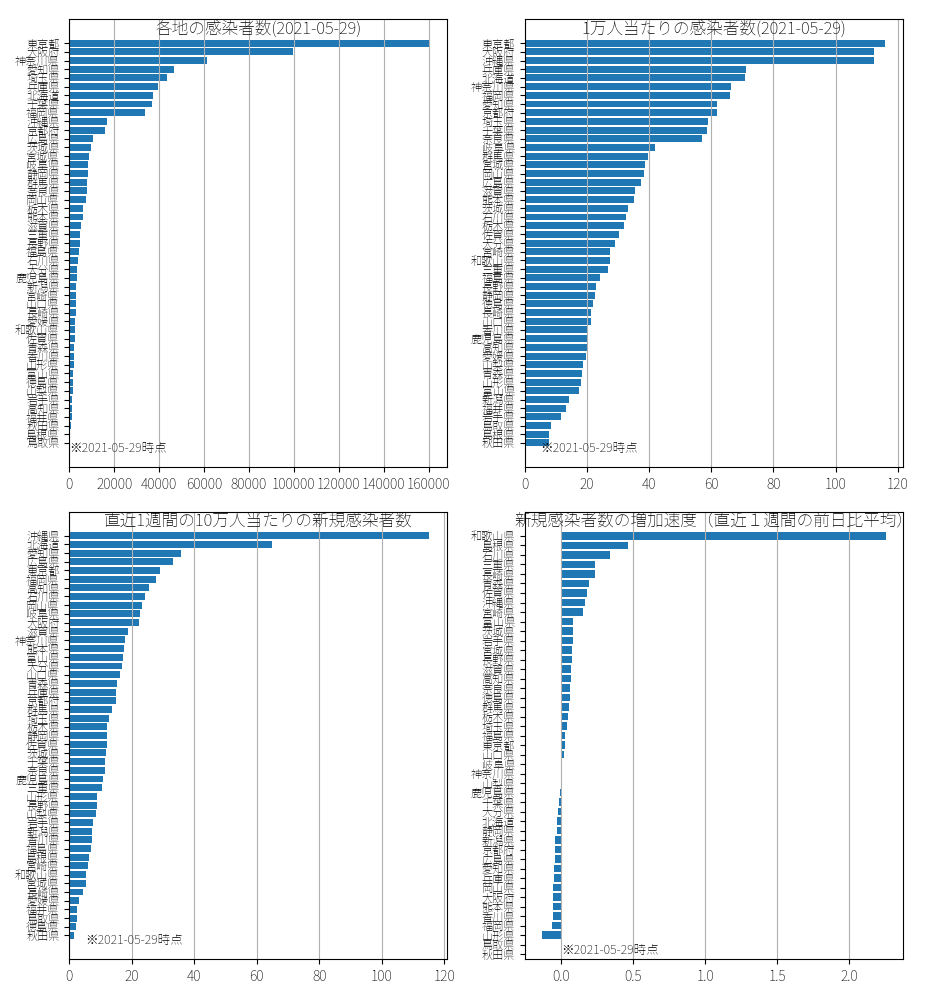

In [26]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,2,1) # (rows, columns, panel number)
#plt.xticks(rotation="70",fontsize=9)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
#plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")
#plt.title("各地の感染者数", y=0.9)
plt.title("各地の感染者数({})".format(latest_date),y=0.95)
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数({})".format(latest_date),y=0.95)
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.95)
# plt.text(0,chart_data["都道府県名"][-1],"{}時点".format(latest_date))
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(2,2,4) # (rows, columns, panel number)
chart_data = all_jp.sort_values("直近1週間の新規感染者数前日比平均",na_position="first")
plt.yticks(fontsize=8)
plt.grid(axis="x")
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）",y=0.95)
plt.text(0,2,"※{}時点".format(latest_date),fontsize=9)

fig.tight_layout()


In [22]:
fig.savefig("/tmp/covid-domestic.png")

## 度数分布表

In [23]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   465.    20437.75  40410.5   60383.25  80356.   100328.75 120301.5
 140274.25 160247.  ]


## ヒストグラム

<IPython.core.display.Javascript object>


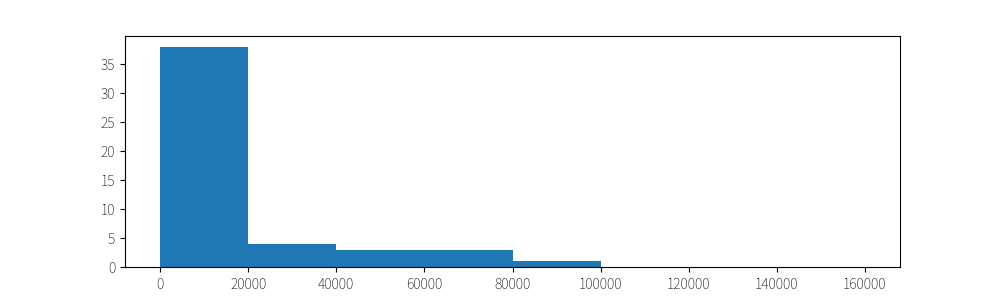

(array([38.,  4.,  3.,  1.,  0.,  0.,  0.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [24]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


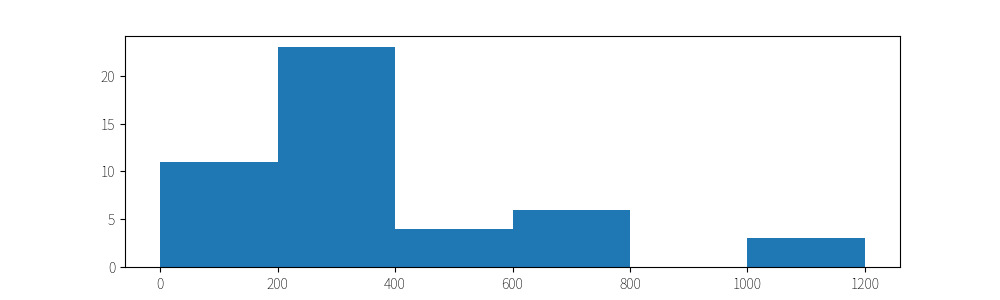

(array([11., 23.,  4.,  6.,  0.,  3.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [25]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
